In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot

In [3]:
cols = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

In [5]:
#Load data, no headers, use up to several space characters to split data, name of columns is cols
df= pd.read_csv('housing.csv', header= None, delimiter = '\s+', names = cols)

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [7]:
from statsmodels.formula.api import ols

# Simple Linear Regression

In [8]:
#import 
from sklearn import preprocessing, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
import numpy as np



In [9]:
linear_regression = linear_model.LinearRegression()

In [10]:
x = df.loc[:, 'lstat']
y = df['medv']

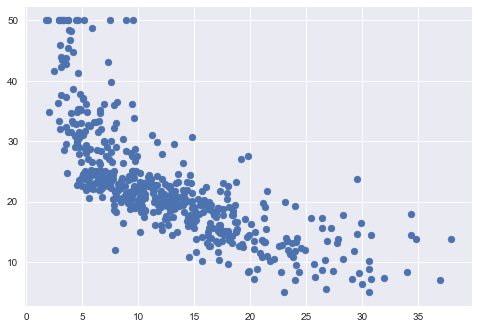

In [62]:
plt.scatter(x, y)

## Fit the Model

### Using sklearn: sklearn.linear_model.LinearRegression

In [12]:
#store into variable
regr = LinearRegression()

# focus on lstat predictor
# medv is the dependent variable
X = df.lstat.values.reshape(-1,1)
y = df.medv

# Fit X and y using a simple regression
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(regr.intercept_)

34.5538408793831


In [14]:
print(regr.coef_)

[-0.95004935]


### Using Statsmodels: statsmodels.api (use)

In [15]:
import statsmodels.api as sm

In [16]:
X = df.lstat.values.reshape(-1,1)

X = sm.add_constant(X)

y = df.medv

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 15 May 2020   Prob (F-statistic):           5.08e-88
Time:                        10:05:53   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
x1            -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  Using Statsmodels: Ordinary Least Squares (use)

In [26]:
X = df['lstat']

In [27]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [28]:
y = df.medv

In [29]:
X = sm.add_constant(X)

/Users/johnrick/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [30]:
model = sm.OLS(y,X)

In [31]:
results = model.fit()

In [32]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 15 May 2020   Prob (F-statistic):           5.08e-88
Time:                        10:10:07   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

## Find Coefficients: Coef()

In [ ]:
# sklearn.linear_model.LinearRegression

In [33]:
#store into variable
regr = LinearRegression()

# focus on lstat predictor
# medv is the dependent variable
X = df.lstat.values.reshape(-1,1)
y = df.medv

# Fit X and y using a simple regression
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
### Coef()
print(regr.coef_)

[-0.95004935]


In [35]:
print(regr.singular_)

[160.47539859]


## Find Confidence Interval

In [36]:
from scipy import stats
import numpy as np

In [ ]:
# X = df.lstat.values.reshape(-1,1)
# X = sm.add_constant(X)
# y = df.medv

# model = sm.OLS(y, X).fit()
# model.summary()

In [37]:
X = df.lstat.values.reshape(-1,1)

In [38]:
X = sm.add_constant(X)

In [39]:
y = df.medv

In [40]:
model = sm.OLS(y,X).fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 15 May 2020   Prob (F-statistic):           5.08e-88
Time:                        10:11:04   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
x1            -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#99% Confidence Interval
print(model.conf_int(.01))

               0          1
const  33.099101  36.008581
x1     -1.050199  -0.849899


In [44]:
# 95% Confidence Interval
print(model.conf_int(.05))

               0          1
const  33.448457  35.659225
x1     -1.026148  -0.873951


In [45]:
# 5% CI can be found on summary in Statsmodels
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 15 May 2020   Prob (F-statistic):           5.08e-88
Time:                        10:11:48   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
x1            -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Just Confidence Interval from summary
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,34.5538,0.563,61.415,0.000,33.448,35.659
x1,-0.9500,0.039,-24.528,0.000,-1.026,-0.874


## Create Predictions

In [47]:
medv_pred = model.predict(X)

In [48]:
new = np.array([[1,5], [1,10], [1,15]])

In [50]:
#predictions for [1,5], [1,10], [1,15]
model.predict(new)

array([29.80359411, 25.05334734, 20.30310057])

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y, medv_pred)

0.5441462975864799

### Create using 95% prediction intervals

In [52]:
def predict(model, new_values):
    # get predicted values
    fit = pd.DataFrame(model.predict(new_values), columns= ['fit'])
    
    #get ci for the model and rename columns
    ci = model.conf_int().rename(columns = {0: 'lower', 1: 'upper'})
    
    #matrix multiplication
    ci = ci.T.dot(new_values.T).T
    
    return pd.concat([fit,ci], axis = 1)
    

In [53]:
predict(model, new)

,fit,lower,upper
0,29.803594,28.317716,31.289472
1,25.053347,23.186975,26.919720
2,20.303101,18.056234,22.549967


## Plot With Least Squares Regression

### abline()

In [54]:
X, y = df.lstat, df.medv

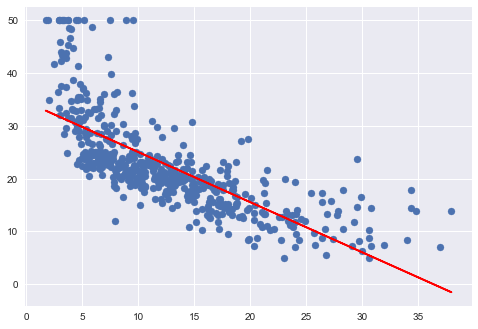

In [55]:
pyplot.scatter(X,y)

# creating the line of the predicted values of our linear model
pyplot.plot(X, medv_pred, color = 'r')
# pyplot.plot(X, medv_pred + 10 , color = 'g')

pyplot.show()

In [56]:
#residuals statistics
model.resid.describe()

count    5.060000e+02
mean     3.532001e-14
std      6.209603e+00
min     -1.516745e+01
25%     -3.989612e+00
50%     -1.318186e+00
75%      2.033701e+00
max      2.450013e+01
dtype: float64

In [57]:
model.conf_int(alpha = .05)

,0,1
const,33.448457,35.659225
x1,-1.026148,-0.873951


## par()

In [246]:
### How To Have Multiple plots onto one plot

In [66]:
import matplotlib.pyplot as plt

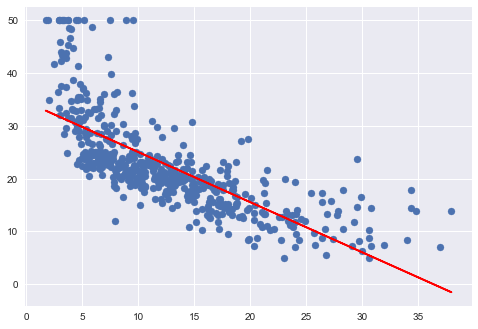

In [75]:
pyplot.scatter(X,y)

# creating the line of the predicted values of our linear model
pyplot.plot(X, medv_pred, color = 'r')
# pyplot.plot(X, medv_pred + 10 , color = 'g')

pyplot.show()

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.SubplotBase.html#matplotlib.axes.SubplotBase

#for link to different possible charts on ax

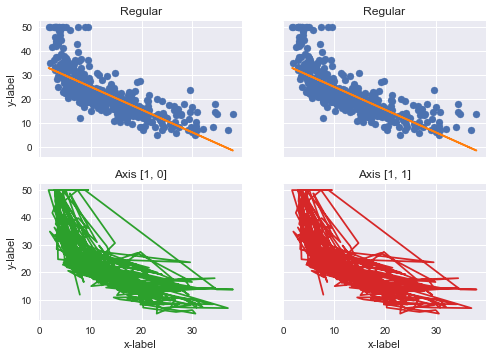

In [84]:
fig, axs = plt.subplots(2, 2)

#scatter plots in subplots
axs[0, 0].scatter(X, y)
axs[0, 0].set_title('Regular')
axs[0, 0].plot(X, medv_pred,'tab:orange')
axs[0, 1].scatter(X, y)
axs[0, 1].set_title('Regular')
axs[0, 1].plot(X, medv_pred,'tab:orange')
axs[1, 0].plot(X, y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(X, y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## hatvalues()

In [248]:
# create instance of influence 
influence = model.get_influence()

In [249]:
#leverage (hat values)
leverage = influence.hat_matrix_diag

In [250]:
#Cook's D values (and p-values)
cooks_d = influence.cooks_distance

In [251]:
#standardized residuals
standardized_residuals = influence.resid_studentized_internal

In [252]:
#studentized residuals
studentized_residuals = influence.resid_studentized_external

In [255]:
influence.summary_table()

obs,endog,fitted,Cook's,student.,hat diag,dffits,ext.stud.,dffits
,,value,d,residual,,internal,residual,
0.0,24.0,29.82259509766828,0.0018862150344469278,-0.9387498856695723,0.004262518322148899,-0.06142011127386415,-0.9386390948647667,-0.06141286250221245
1.0,21.6,25.870389786035034,0.0005823668450793794,-0.6878711872594333,0.002455526737007469,-0.03412819494433831,-0.6875112379809237,-0.03411033634032265
2.0,34.7,30.72514198373837,0.0010042099597060627,0.6410413815938935,0.004863679692773001,0.044815398240026005,0.640666347497306,0.04478917949210311
3.0,33.4,31.760695779334583,0.00019836962438466634,0.2644803556506932,0.005639778771456194,0.019918314405825928,0.2642361812937982,0.01989992535912902
4.0,36.2,29.49007782385298,0.0023841664095388617,1.0816987993935567,0.004058706105211851,0.06905311592591404,1.0818817155560787,0.06906479286498658
5.0,28.7,29.604083746303942,4.402301265445784e-05,-0.14575133075432695,0.004127512832887802,-0.009383284356179114,-0.14560973312127873,-0.009374168481571472
6.0,22.9,22.744727412171237,6.196762965998035e-07,0.025005210520714614,0.001978216727199107,0.0011132621403782698,0.024980406942389947,0.0011121578551465225
7.0,27.1,16.360395754917533,0.005435708719897778,1.7309339710586762,0.003615365345651893,0.10426608959674069,1.7343787934276185,0.10447359500351557
8.0,16.5,6.1188637214063775,0.019445783381344516,1.6815774213085515,0.013567168624699043,0.1972094489690822,1.6846408652545517,0.1975687188337241


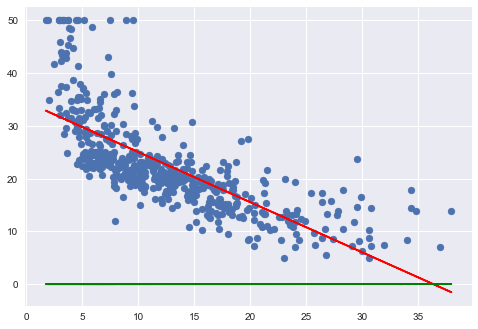

In [259]:
pyplot.scatter(X,y)
pyplot.plot(X, medv_pred, color = 'r')
pyplot.plot(x, leverage, color = 'g')
# pyplot.plot(X, medv_pred + 10 , color = 'g')

pyplot.show()

In [260]:
## 

In [269]:
def list_to_string(word_list):
    return " ".join(word_list)

In [283]:
list_to_string(word_list)

'absolute accomplished aces adept admirable awesome bad baron best boss caesar caliph capital champ champion chief choice classical cold conquering-hero conqueror conquistador consummate cool crack crowning culminating czar dandy defeater distinguished dominant dynamite elite emperor excellent excelling exceptional experienced expert fantastic fine finest finished first foolproof gold medalist good greatest head heavy hero ideal impeccable kaiser khan king leading magnate maharajah majesty marvelous medalist mikado mogul monarch overlord pasha perfect positive potentate preeminent premier primary prime prince principal prizewinner pure queen rajah rex shah sound sovereign splendid stainless subduer subjugator sublime sultan super superb superior ten terrific title-holder top top dog tops total tough tremendous tycoon unbeaten undefeated utopian vanquisher victor winner wonderful'

In [282]:
word_list = ['absolute',
'accomplished',
'aces',
'adept',
'admirable',
'awesome',
'bad',
'baron',
'best',
'boss',
'caesar',
'caliph',
'capital',
'champ',
'champion',
'chief',
'choice',
'classical',
'cold',
'conquering-hero',
'conqueror',
'conquistador',
'consummate',
'cool',
'crack',
'crowning',
'culminating',
'czar',
'dandy',
'defeater',
'distinguished',
'dominant',
'dynamite',
'elite',
'emperor',
'excellent',
'excelling',
'exceptional',
'experienced',
'expert',
'fantastic',
'fine',
'finest',
'finished',
'first',
'foolproof',
'gold medalist',
'good',
'greatest',
'head',
'heavy',
'hero',
'ideal',
'impeccable',
'kaiser',
'khan',
'king',
'leading',
'magnate',
'maharajah',
'majesty',
'marvelous',
'medalist',
'mikado',
'mogul',
'monarch',
'overlord',
'pasha',
'perfect',
'positive',
'potentate',
'preeminent',
'premier',
'primary',
'prime',
'prince',
'principal',
'prizewinner',
'pure',
'queen',
'rajah',
'rex',
'shah',
'sound',
'sovereign',
'splendid',
'stainless',
'subduer',
'subjugator',
'sublime',
'sultan',
'super',
'superb',
'superior',
'ten',
'terrific',
'title-holder',
'top',
'top dog',
'tops',
'total',
'tough',
'tremendous',
'tycoon',
'unbeaten',
'undefeated',
'utopian',
'vanquisher',
'victor',
'winner',
'wonderful']

In [266]:
" ".join(word_list)

'able active athletic big capable durable energetic firm forceful heavy robust secure solid stable steady substantial tenacious tough vigorous able-bodied enduring fixed forcible hale hardy hearty heavy-duty mighty muscular reinforced rugged sinewy sound stalwart stark staunch stout strapping sturdy unyielding well-built well-founded well-made astute aware careful educated enlightened experienced informed judicious knowledgeable perceptive prudent rational sane sensible shrewd smart thoughtful wary well-informed contemplative cunning grasping keen knowing sage sensing sharp sound understanding calculating clever cogitative crafty discerning discreet erudite foresighted insightful intuitive perspicacious politic reflective sagacious sapient scholarly sophic tactful taught witty audacity bravery daring determination endurance fearlessness firmness fortitude gallantry grit heroism prowess spirit spunk tenacity valor adventurousness backbone bravura dash dauntlessness enterprise gameness g